In [1]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("pacmap"),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
)

[22:46:14] INFO     Getting dataset s1k                                              ]8;id=798913;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=588277;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=126572;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=108783;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Using precomputed knn                                               ]8;id=814323;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=836808;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#68\68]8;;\

           INFO     Found pre-calculated neighbors file:                             ]8;id=849898;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=408241;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#319\319]8;;\
                    nn/s1k.15.euclidean.exact.faiss.idx.npy                                         

[22:46:15] INFO     Converted knn to pair neighbors: (10000, 2)                         ]8;id=254558;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=57539;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#76\76]8;;\

           INFO     Running PaCMAP                                                     ]8;id=694206;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=390037;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#112\112]8;;\

           INFO     Embedding completed                                                ]8;id=622806;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=667251;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#115\115]8;;\

           INFO     Evaluating                                                       ]8;id=880616;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=494129;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=958792;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=980893;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=2345;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=461986;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=379589;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=600272;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=528364;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=967125;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=660987;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=571785;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

[22:46:16] INFO     rpc-5-euclidean                                                       ]8;id=574006;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=268076;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=128114;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=605619;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=465278;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=855451;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=844709;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=669431;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=706046;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=328790;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=771778;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=543806;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Loading faiss with AVX2 support.                                   ]8;id=353983;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=858942;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=375241;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=232129;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

[22:46:17] INFO     Plotting                                                         ]8;id=903561;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=202010;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

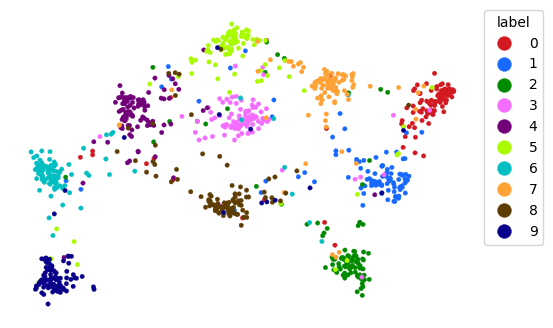

In [2]:
embed_result = embed_pipeline.run("s1k")

PaCMAP parameters from [the Python docstring](https://github.com/YingfanWang/PaCMAP/blob/master/source/pacmap/pacmap.py):

* `n_neighbors=10`
* `MN_ratio=0.5` Ratio of mid near pairs to nearest neighbor pairs (e.g. 
`n_neighbors=10, MN_ratio=0.5` --> 5 Mid near pairs).
* `FP_ratio=2.0` Ratio of further pairs to nearest neighbor pairs (e.g. 
`n_neighbors=10, FP_ratio=2` --> 20 Further pairs).
* `pair_neighbors=None`: `numpy.ndarray` of shape `(X.shape[0] * n_neighbors, 2)`, Pre-calculated 
nearest neighbor pairs. There will be `n_neighbors` pairs per item `i`, of the form `[i, j]` where 
`j` is the index of the neighbors.
* `pair_MN=None`: `numpy.ndarray` of shape `(X.shape[0] * n_mid_near, 2)`. Pre-calculated mid near 
pairs.
* `pair_FP=None`: `numpy.ndarray` of shape `(X.shape[0] * n_further_pair, 2)`. Pre-calculated 
further pairs.
* `distance="euclidean"`: distance metric. One of: `"euclidean"`, `"manhattan"`, `"angular"`, 
`"hamming"`.
* `lr=1.0`: learning rate of the Adam optimizer.
* `num_iters=450`. Number of iterations (epochs in UMAP-speak). Internally, different weights are 
used for the different types of pairs based on the absolute value of the iteration number 
(transitions at 100 and 200 iterations), so it is recommended to set this > 250.
* `apply_pca=True`: whether to apply PCA on the input data. Ignored if `distance="hamming"` or 
there are fewer than 100 dimensions in the input data. Otherwise, the first 100 components from 
truncated SVD are extracted. Data is centered. If no PCA is applied then data is scaled to 0-1 
globally (columns maintain their ratio of variances) and then mean-centered.
* `intermediate=False`: if `True`, then snapshots of the coordinates at intermediate steps of the 
iteration are also returned.
* `intermediate_snapshots=[0, 10, 30, 60, 100, 120, 140, 170, 200, 250, 300, 350, 450]`: the 
iterations at which snapshots are taken. Ignored unless `intermediate=True`. Internally, it seems
necessary to add a snapshot at the final iteration, which `drnb` will handle for you.
* `random_state=None`.
* `init`: one of `"pca"` (PCA scaled by 0.01, this is the default), `"random"` (t-SNE style) or a user-supplied matrix (which is [Z-scaled](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and then scaled by 1e-4).

An example with snapshots returned:

[22:46:18] INFO     Getting dataset s1k                                              ]8;id=792746;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=502557;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=573177;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=787924;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     Using precomputed knn                                               ]8;id=794128;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=636238;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#68\68]8;;\

           INFO     Found pre-calculated neighbors file:                             ]8;id=195309;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=326269;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#319\319]8;;\
                    nn/s1k.15.euclidean.exact.faiss.idx.npy                                         

           INFO     Converted knn to pair neighbors: (10000, 2)                         ]8;id=819917;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=737651;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#76\76]8;;\

           INFO     Running PaCMAP                                                     ]8;id=314063;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=644045;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#112\112]8;;\

           INFO     Embedding completed                                                ]8;id=544338;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py\pacmap.py]8;;\:]8;id=532588;file:///home/james/dev/drnb3/src/drnb/embed/pacmap.py#115\115]8;;\

           INFO     Evaluating                                                       ]8;id=415313;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=625618;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=799269;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=848117;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=381453;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=287660;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=41661;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=657396;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=916927;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=443736;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=272054;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=883433;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=526040;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=157785;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=325430;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=959281;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=752879;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=146544;file:///home/james/dev/drnb3/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=417211;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=454018;file:///home/james/dev/drnb3/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=148417;file:///home/james/dev/drnb3/src/drnb/triplets.py\triplets.py]8;;\:]8;id=393922;file:///home/james/dev/drnb3/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=67538;file:///home/james/dev/drnb3/src/drnb/eval/base.py\base.py]8;;\:]8;id=581079;file:///home/james/dev/drnb3/src/drnb/eval/base.py#61\61]8;;\

[22:46:19] INFO     Plotting                                                         ]8;id=700866;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=427982;file:///home/james/dev/drnb3/src/drnb/embed/pipeline.py#281\281]8;;\

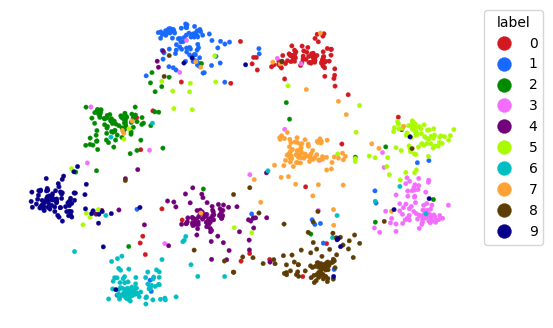

In [3]:
embed_result_with_snapshots = pl.create_pipeline(
    method=pl.embedder(
        "pacmap",
        params={
            "intermediate": True,
            "intermediate_snapshots": [0, 100, 200],
        },
        init="random",
    ),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
).run("s1k")

In [4]:
embed_result_with_snapshots["snapshots"].keys()

dict_keys(['it_0', 'it_100', 'it_200', 'it_450'])

To plot the snapshots, the `plot_embedding_snapshots` function can be of use:

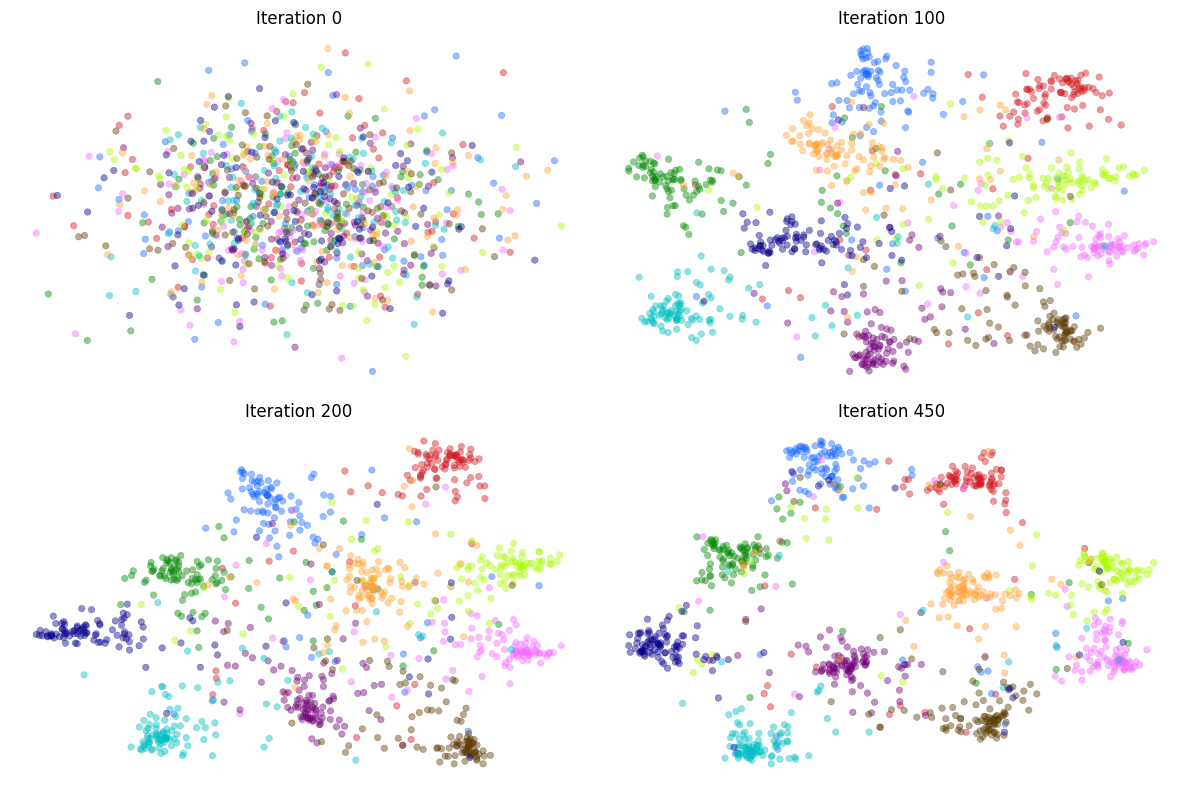

In [5]:
from drnb.plot.snapshotplot import plot_embedding_snapshots

_ = plot_embedding_snapshots(embed_result_with_snapshots, n_cols=2, figsize=(6, 4))

If you use pre-computed neighbors, you don't sample from the extended neighborhood. The 
[script demonstrating using pre-computed neighbors](https://github.com/YingfanWang/PaCMAP/blob/master/demo/specify_nn_demo.py)
at the PaCMAP repo also doesn't use the extended neighborhood, so it's probably not of that much
importance. You can ask PaCMAP to find its own neighbors with the `use_precomputed_knn=False`
keyword (this controls how drnb behaves, not the underlying implementation of PaCMAP).

At any rate, here's the `mammoth` dataset without pre-computed neighbors, which PaCMAP does very
well on:

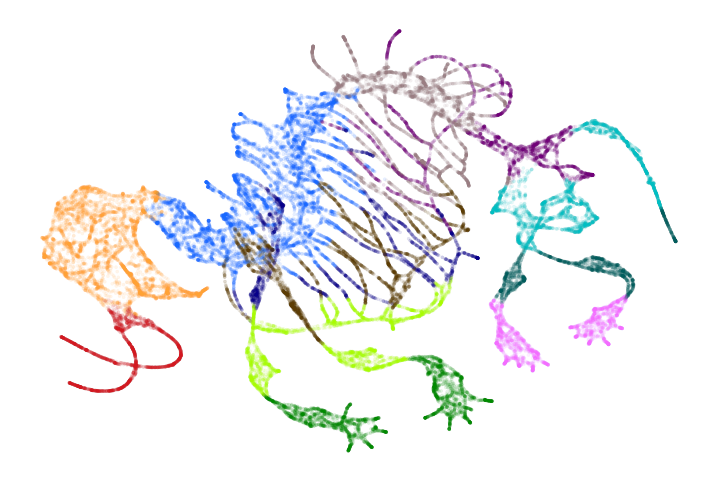

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.85522), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.84126794), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.5776973333333333), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.5932671999999999), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.6106778666666668), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [6]:
pl.create_pipeline(
    method=pl.embedder(
        "pacmap",
        use_precomputed_knn=False,
    ),
    plot=dict(
        figsize=(9, 6),
        legend=False,
    ),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
).run("mammoth")["evaluations"]